# GPT Interface for SubOcean Visualization
Test GPT-powered plot commands and interactive features

In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

# Setup paths and imports
notebook_dir = Path.cwd()
src_dir = notebook_dir.parent / 'src'
if str(src_dir) not in sys.path:
    sys.path.insert(0, str(src_dir))

from core.profile import Profile
from gpt_interface.prompt_handler import PromptHandler
from core.executor import Executor

# Load data
data_path = Path('../data/Level0/SubOceanExperiment2024-11-27T12-58-44.txt')
log_path = Path('../data/Level0/SubOceanExperiment2024-11-27T12-58-44.log')

profile = Profile(data_path, log_path)
df, metadata = profile.load()

# Initialize handlers
prompt_handler = PromptHandler()
prompt_handler.df = df
executor = Executor()



Executing command: I want a 3d plot of N2O, CH4 and depth

Generated code:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x_data = df['[N2O] dissolved with water vapour (ppm)']
y_data = df['[CH4] dissolved with water vapour (ppm)']
z_data = df['Depth (meter)']

ax.scatter(x_data, y_data, z_data)

ax.set_xlabel('N2O dissolved (ppm)')
ax.set_ylabel('CH4 dissolved (ppm)')
ax.set_zlabel('Depth (meter)')

plt.show()


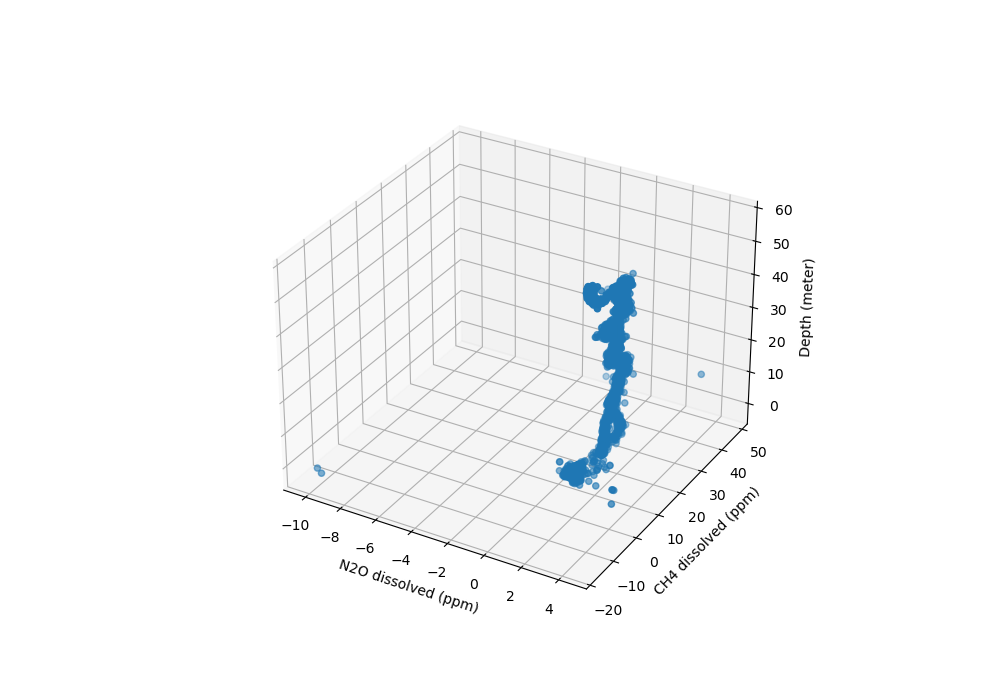

Successfully executed


In [2]:

#cmd = "Create a plot showing CH4 vs Depth"
#cmd = "Set the depth as y axis"   
#cmd = "Sort the y axis from 0 to max depth" 
#cmd = "Invert y axis"
cmd = "I want a 3d plot of N2O, CH4 and depth"
#cmd = "Now i want to visualize the standard error with timestamp"
#cmd = "I want you to filter out the standard error that is more than 0.2, and then plot the CH4 again with timestamp"
print(f"\nExecuting command: {cmd}")

# Generate code
code = prompt_handler.generate_plot_code(cmd)
print("\nGenerated code:")
print(code)

# Execute with DataFrame
error = executor.run(code, df=df)

if error:
    print(f"Error during execution: {error}")
else:
    print("Successfully executed")

In [1]:
import numpy